# Info 6010 Ex 3
### due Fri 13 Mar 2019

Rather than working from this notebook, it's best if you start a new notebook.<br>
The first cell should be a markdown cell containing your name (use the menu button 2nd from right above to change from code to markdown).<br>
Then you should transfer only the cells you need into the new notebook, so they're not lost in the explanatory text below.

Upload to: https://pgcourse.infosci.cornell.edu/cgi-bin/probset.py

## 1) Logistic Regression (multinomial)

[Although this looks long, it's actually very simple, and the verbosity is to guide you through it. Some of what is requested is already implemented in the digits.ipynb notebook used in class. Note that I'll return to discuss a bit more about multinomial regression during lecture 7 on 6 Mar]

In the [digits_classification_exercise](http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html) discussed in class (see [digits.ipynb](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/lec5_digits.ipynb)), [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) was used to classify 8x8 images of handwritten digits. The object of this exercise is to get a better understanding of how that works, and also to train a 'multinomial' version of the logistic classifier (rather than the default 'ovr' = "one versus rest").

**1.** First train the default logistic regression `logreg_ovr` as in the digits.ipynb notebook (using same training and test set). Check that you get the same .938888 = 169/180 score, meaning that it gets 11 of the 180 test images incorrect.  What are the indices of the `X_test array` corresponding to the ones that it gets wrong?

**2.** Consider the three images `test3 = [np.copy(X_test[i]) for i in (109, 110, 113)]`. Check that those are ones that the classifier gets wrong. See if you can manipulate a single pixel of the three images to get the classifier to get them right, as follows. Each is supposed to be a 3, so one way to do this would be to look at the weights associated to classifying an object as a 3. `logref_ovr.coef_` is an array of shape `(10,64)`, and each row is an array of 64 weights that multiply the corresponding pixel values. (These weights are called $\vec w_i$ in the [lec5.pdf](https://www.cs.cornell.edu/~ginsparg/6010/spr20/lec5.pdf) notes.) `logref_ovr.intercept_` is an array of `10` numbers that provide the thresholds for each of the 10 "one versus rest" classifiers (0 or not 0, 1 or not 1, ...), and are added in turn to the corresponding sum of products of weights and features for each digit. (These are called $b_i$ in the formula $x_i = \vec w_i \cdot \vec f + \vec b_i$ in the lec5 notes.) Thus `logreg_ovr.coef_[3]` gives the 64 weights used in the "3 or not 3" classifier.  Identify the largest weight and see if the corresponding pixel in the three images is already large (the max value is 16). If it is not already large, then see what happens when you increase its value. Otherwise look for the most negative weight, and see if that corresponding pixel in the three images has a large value, and see what happens if you decrease it. Either way should make it more likely for the image to be classified as a 3.

Note that `logreg_ovr.predict(test3)` will give the predictions for each of the three, `y_test[[109, 110, 113]]` will give their labelled values, and `logreg_ovr.predict_proba(test3)` will give the ten probabilities that they're each of the ten digits. (The `.predict()` method picks the label with the highest probability.)

**3.** Now let's check how those probabilities are calculated. `logreg_ovr.predict_proba([X_test[0]])` gives the probabilities that the first test image is each of the ten digits (the highest is for 5, which gives correctly the labelled value `y_test[0]` for this image). Use `logreg_ovr.coef_` and `logreg_ovr.intercept_` to calculate the values $x_i = \vec w_i \cdot \vec f + \vec b_i$ (where the 64 $\vec f$ values are given by `X_test[0]`), then plug them into the (binomial) logistic function $q(i) = 1/(1+\exp(-x_i))$. Finally, calculate the probabilities $p(i) = q(i) / \sum_{j=0}^9 q(j)$. These should agree with the values given by `logreg_ovr.predict_proba([X_test[0]])`.

**4.** Now train a classifier using the 'multinomial' option, 

    logreg_multi = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')
    
use it to fit the same training data as above, and score on the same test data. You should find again 169/180, but check whether it misses a different set of 11 images. (In fact, although it misses overall the same number, the ones that it misses are slightly different.)  In particular see whether it misses the three `test3` in part **2**, and see whether the single pixel manipulation used there causes it to get this classifier correct as well.

**5.** Finally, see how the `logreg_multi.predict_proba()` probabilities are calculated. Using the `.coef_` and `.intercept_` attributes, calculate the $x_i = \vec w_i \cdot \vec f + \vec b_i$, as in part **3** for $\vec f$ features given by `X_test[0]`. Now calculate the probabilities using the multinomial logistic formula $p(i) = \exp(x_i) / \sum_{i=0}^9 \exp(x_i)$.
These should agree with the values given by `logreg_multi.predict_proba([X_test[0]])`.

## 2) Sentiment Analysis II

**A.** Return to problem 3 of [Ex2](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/Ex2.ipynb), and use instead logistic regression for the binary features (again probably easiest to use sklearn.linear_model.LogisticRegression()) on the same feature sets as in parts A,B.

This should be very simple, since the feature sets are the same as before, it's just a question of swapping in [sklearn.linear_model.LogisticRegression()[(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) instead of [sklearn.naive_bayes.BernoulliNB()](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) (and you have access to [Ex2 solutions](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/Ex2s.ipynb).

**B.** Try the same for the 12 class dataset used in Ex1 problem 2D
(as covered as well in [lec5_ex.ipynb](https://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/spr20/lec5_ex.ipynb)), again swapping in LogisticRegression() for BernoulliNB()

## 3) Mortality

As mentioned in class on 28 Feb, there has been much recent discussion of trends in mortality rates in the United States over the past two decades, specifically among middle-aged non-Hispanic whites (labelled "White 'Deaths of Despair' in the figure screengrabbed from this [28Apr17 nytimes article](https://www.nytimes.com/2017/04/13/opinion/reaching-out-to-the-voters-the-left-left-behind.html) in the [lec6 slides](https://www.cs.cornell.edu/~ginsparg/6010/spr20/lec6.pdf).
While the mortality rates in other comparable countries (e.g., wealthy western European) have continued to decline, the U.S. alone has apparently seen a reversal of that trend, at least in some demographic groups.
The object of this problem is to visualize some of that data, using techniques entirely from previous problem sets. It is intended to be an extremely straightforward application of those earlier methods to confirm they've been conveyed. 

As mentioned in lecture, the U.S. Center for Disease Control (CDC) maintains an extremely useful [Wonder](https://wonder.cdc.gov/ucd-icd10.html) database (click on "I Agree" at bottom to get the request form), with extensive [instructions](https://wonder.cdc.gov/wonder/help/ucd.html).
You should feel free to experiment with this database, but in principle the rest of the problem can be completed using these two data samples pulled down from that site:
[cdc0.tsv](https://www.cs.cornell.edu/~ginsparg/6010/spr20/cdc0.tsv) and
[cdc1.tsv](https://www.cs.cornell.edu/~ginsparg/6010/spr20/cdc1.tsv), where the rates for 45-54 year olds have been selected, along with the features necessary to select for the recent focus group of non-Hispanic whites.<br>
The simple selections used to pull down these two data samples are given in the screengrabs at the end of this problem, if you want to experiment further.

**A)** To get a feeling for the data, first select out and plot the total death rate data for this demographic, combining male and female. It should look something like this:

In [2]:
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

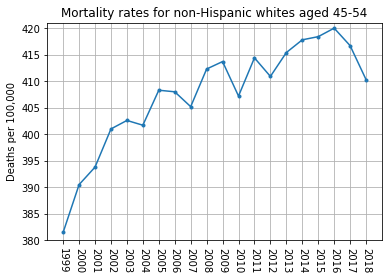

In [12]:
Image('cdc0.png')

The relevant data can be extracted from the text file cdc0.tsv downloaded from the CDC site, by splitting on '\n' to get the rows, and then splitting on '\t' to get the entries for each column in that row. (e.g., one way to retrieve a list of the entries row by row would be `[row.split('\t') for row in open('cdc0.tsv').read().split('\n')]`, but perhaps a better way is to recognize it as 'tab separated values' standard spreadsheet format and use the csv.reader() with '\t' for tab delimiter:

    with open('cdc0.tsv') as csvfile:
        for row in csv.reader(csvfile, delimiter='\t'):
            ...  #row will be a list of entries

Note that the data file 
[cdc0.tsv](https://www.cs.cornell.edu/~ginsparg/6010/spr19/cdc0.tsv)
has redundant information, giving both the rates for men and women separately, and the 'Total' rates. You need only the total rates for this part (or you can retrieve another data file from the CDC site, without the Gender selection).<br>
[It would have been possible to further preprocess the data and provide an easy to manipulate python object for this problem, but that would have been unrealistic for future endeavors, since that's not the way that the CDC (or other sites) provide it. In class this Fri 6 Mar we'll cover this in more detail, including use of `pandas` as an alternative method for reading the data.]

This graph above shows the increase which has been the cause of concern. (Though note that the effect is exaggerated due to a subtle effect: because of the baby boom generation, the average age within the bin of 45-54 year olds in later years such as 2016 is higher than in 1999 -- correcting for this leads to a flatter rate, but is still noticeably different from the declining rate in other countries. We'll ignore this effect until [bonus] part D).

**B) i)** This next part of the problem is to see whether there's a gender effect. Now partition the data according to the 'M' or 'F' column, and plot the two lines on a single graph.  Because the mean for women averages around 300, and the mean for men around 500, to compare them on the same graph you should rescale the data for the two groups by their 1999 values, so that they both start at 1 and give the fractional change from that start year ("relative death rate"). You should find a significant gender effect.

&nbsp; **ii)** Use `linregress()` to calculate the slopes of the two plots, and multiply by 19 to get the 'smoothed' rate of overall increase for the 19 year timeframe 1999-2018. (The slope itself gives the increase per year, rather than over the full timeframe.)

**C)** The third part of this problem is to visualize any geographic effects. The second data file
[cdc1.tsv](https://www.cs.cornell.edu/~ginsparg/6010/spr19/cdc1.tsv)
was retrieved by selecting the additional option to partition the data by states (see graphics below).

&nbsp; **i)** For each state, calculate the linear fit to the slope of the data (as in B.ii))  for both men and women.
Print out the fifty results for each gender, sorted from most to least increase in mortality rate.

(It's very possible the next parts of this problem, involving some simple practice with map data, will be deferred to Ex4, so please don't fret if it looks long. We'll discuss in lecture. The actual problem is just to produce something like the map below.
Before continuing, go through the [basemap tutorial](http://nbviewer.jupyter.org/url/www.cs.cornell.edu/~ginsparg/6010/basemap_notes.ipynb), which provides the basic background for all of this.)

&nbsp; **ii)** For each of men and women (so two separate plots), visualize the geographic data as in  problem 1 above:
for each state plot the slope of the data (multiplied by 18, to get the smoothed increase over the 18 year time frame) using the seismic color map. It might look something like the below (note this isn't intended to be faithful to the data, and instead corresponds to grouping states by the 10 HHS [= Health and Human Services] geographic regions, but regardless you should see geographic effects, though of course the states won't be the same color as their neighbors as in the below):

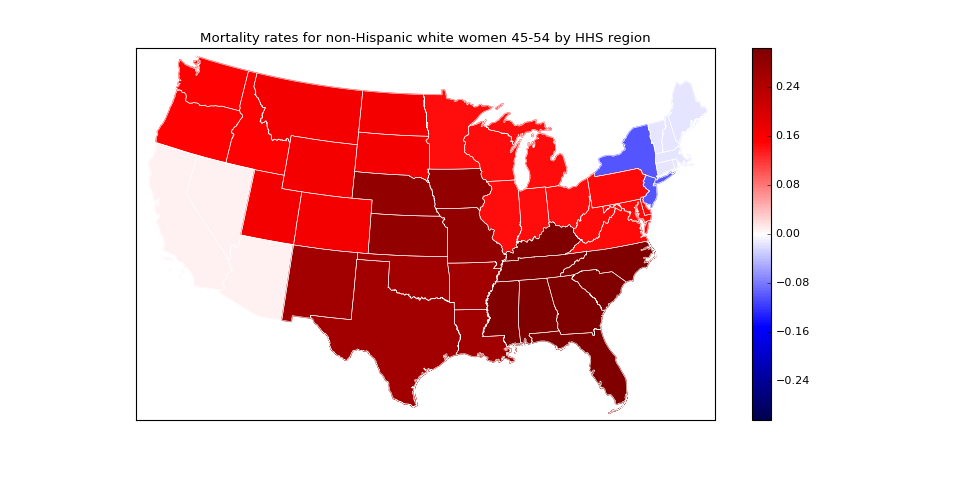

In [6]:
#note this plot is by the aggregated HHS regions, yours should be state by state
Image('/tmp/3Cii.png')

You can either adapt your own code from  problem #1 to make the plot, or the code from the solutions
to problem 1 (to be posted 8 Mar). Alaska, Hawaii, and District of Columbia are optional.

&nbsp; **iii)** You should notice some overall similarities in the geographic plots by state for the M and F data.
What is the Pearson correlation (`from scipy.stats import pearsonr`) between the fifty M and F slopes (i.e., fitted slopes for fifty states for each gender, omit 'District of Columbia')?  Also make a scatter plot of the M vs F smoothed slopes for the fifty states, with a linear fit. It should look something like this:

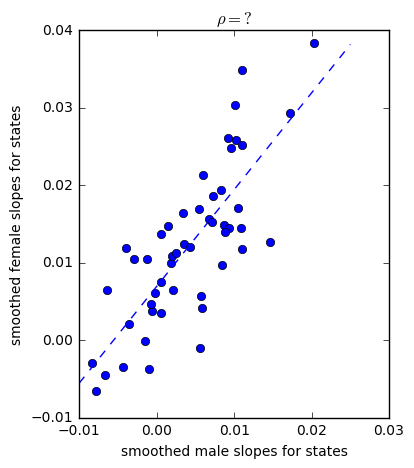

In [15]:
Image('3C.iii.png', width=350)

**D) [Bonus]** Implement the correction mentioned to the graph in part A). Recall that the problem is that due to the post wwII babyboom cohort, the sample of 45-54 year olds in 1999 [and the rest of early 2000s samples] is overrepresented by the younger ages in that range, in contrast to the later samples. This exaggerates the increase in mortality for that ten year age group as that demographic bulge moves through the age range (death rates increase with age, inflating any mortality increase for other reasons). One way to correct for this is to use the option "3. Select demographics" (below) to select single-year ages for each of 45-54, and then average their rates (this gives equal weight to each of the ten years, equivalent to assuming there are equal numbers of people for each year of age of the 10 years of age in the bin). These "age-adjusted" death rates for non-Hispanic whites aged 45-54 (M+F as in part A) show a slightly different pattern than the graph above, with mortality first increasing and then more or less constant since 2005, rather than continuing to increase (though still not decreasing as in other countries, and in other U.S. demographic groups).<br>
But the levelling off is again an average of one gender decreasing, and the other increasing, as in B). Plot M and F combined, and separated out, on the same graph (normalized to 1999 so they're viewable on the same scale as percentage increase.) You can also confirm the same effects for the 35-44 year old group (one decade younger) of non-Hispanic white M and F.

By contrast, the rates for both M and F Hispanic whites and M and F African Americans, in age ranges from 35-44, 45-54, and 55-64, all show decline from 1999 to 2017, so there really does seem to be something begging for explanation in the non-Hispanic white data.

Finally here are the options used to retrieve the two datasets from the CDC site:

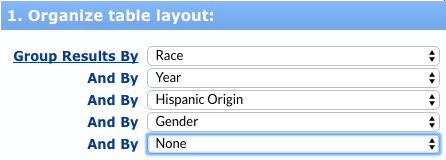

In [1]:
#cdc0.tsv: for option 1, chose to show these columns

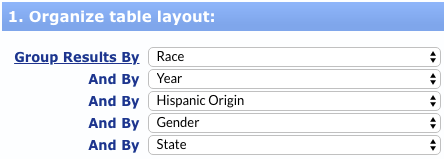

In [2]:
#cdc1.tsv: for option 1, added State

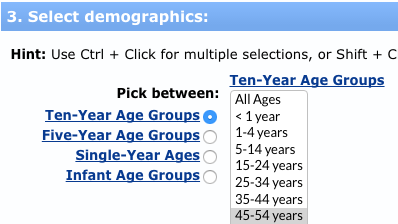

In [3]:
#cdc0.tsv and cdc1.tsv: for option 3, clicked 45-54 years

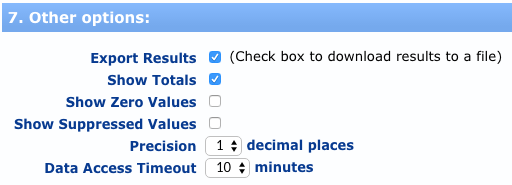

In [4]:
#cdc0.tsv and cdc1.tsv: for option 7, clicked "Export Results", then the "Send" button